# CRU project
High-resolution gridded datasets (CRU TS, CRU CY, CRU CL: 1901-[recent] global land data for multiple variables on a 0.5° x 0.5° or finer grid)

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import netCDF4 as nc
import ipywidgets as widgets

In [8]:
ds = nc.Dataset('../../../Data/weather/land/cru_ts4.06.01.1901.1910.cld.dat.nc')
print(ds)
print(ds['cld'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    title: CRU TS4.06.01 Cloud Cover
    institution: Data held at British Atmospheric Data Centre, RAL, UK.
    source: Run ID = 2206161921. Data generated from:cld.2206151300.dtb, dtr.2204291209.dtb
    history: Thu 16 Jun 22:05:15 BST 2022 : User f098 : Program makegridsauto.for called by update.for
    references: Information on the data is available at http://badc.nerc.ac.uk/data/cru/
    comment: Access to these data is available to any registered CEDA user.
    contact: support@ceda.ac.uk
    dimensions(sizes): lon(720), lat(360), time(120)
    variables(dimensions): float32 lon(lon), float32 lat(lat), float32 time(time), float32 cld(time, lat, lon), int32 stn(time, lat, lon)
    groups: 
<class 'netCDF4._netCDF4.Variable'>
float32 cld(time, lat, lon)
    long_name: cloud cover
    units: percentage
    correlation_decay_distance: 600.0
    _FillValue: 9.96921

In [16]:
@widgets.interact(idx=widgets.Play(min=0,max=119, step=1, interval=500))
def inspect(idx=0):
    plt.figure(figsize=(18,6))
    plt.title(str(idx))
    plt.imshow(ds['cld'][idx], origin='lower')
    plt.colorbar()
    plt.show()

interactive(children=(Play(value=0, description='idx', interval=500, max=119), Output()), _dom_classes=('widge…

# Statistical model of each simulation

In [7]:
simulations = ['cnrm', 'crfc', 'lody', 'scnr', 'scwf', 'smpi', 'ukmo']

models = np.empty((len(simulations), ds.dimensions['latitude'].size, ds.dimensions['longitude'].size, 2))
for idx,sim in enumerate(simulations):
    ensemble = ds[sim][0]
    mean = np.mean(ensemble, axis=0)
    std = np.std(ensemble, axis=0)

    models[idx,:,:,0] = mean
    models[idx,:,:,1] = std

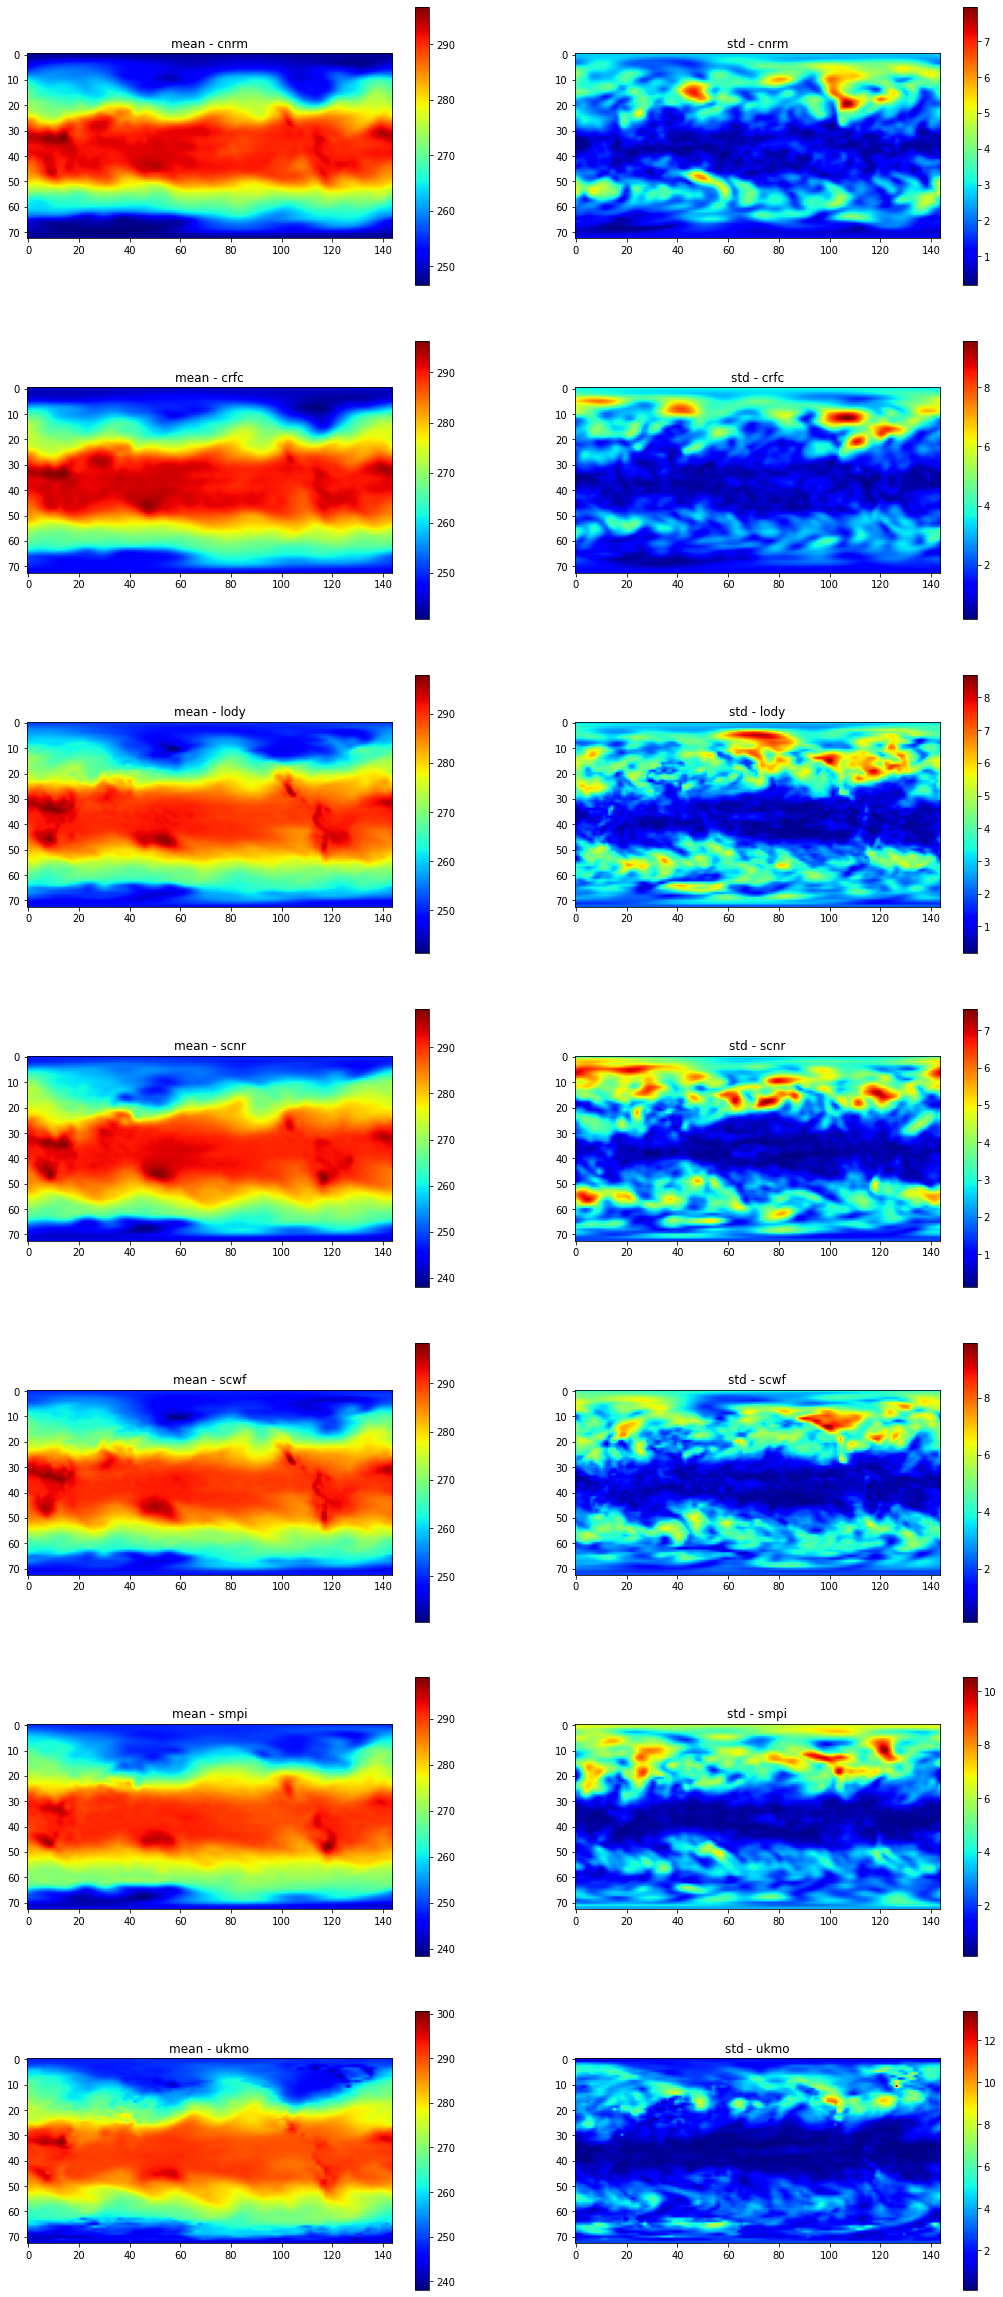

In [9]:
plt.figure(figsize=(18,7*6))
for idx,sim in enumerate(simulations):

    plt.subplot(len(simulations), 2, (2*idx)+1)
    plt.title('mean - ' + sim)
    plt.imshow(models[idx,:,:,0], cmap='jet')
    plt.colorbar()

    plt.subplot(len(simulations), 2, (2*idx)+2)
    plt.title('std - ' + sim)
    plt.imshow(models[idx,:,:,1], cmap='jet')
    plt.colorbar()

plt.show()

# Comparison of the models

In [10]:
def wasserstein(mu1, var1, mu2, var2):
    return np.sqrt(
        ( mu1 - mu2 )**2 + ( np.sqrt(var1) - np.sqrt(var2) )**2
    )

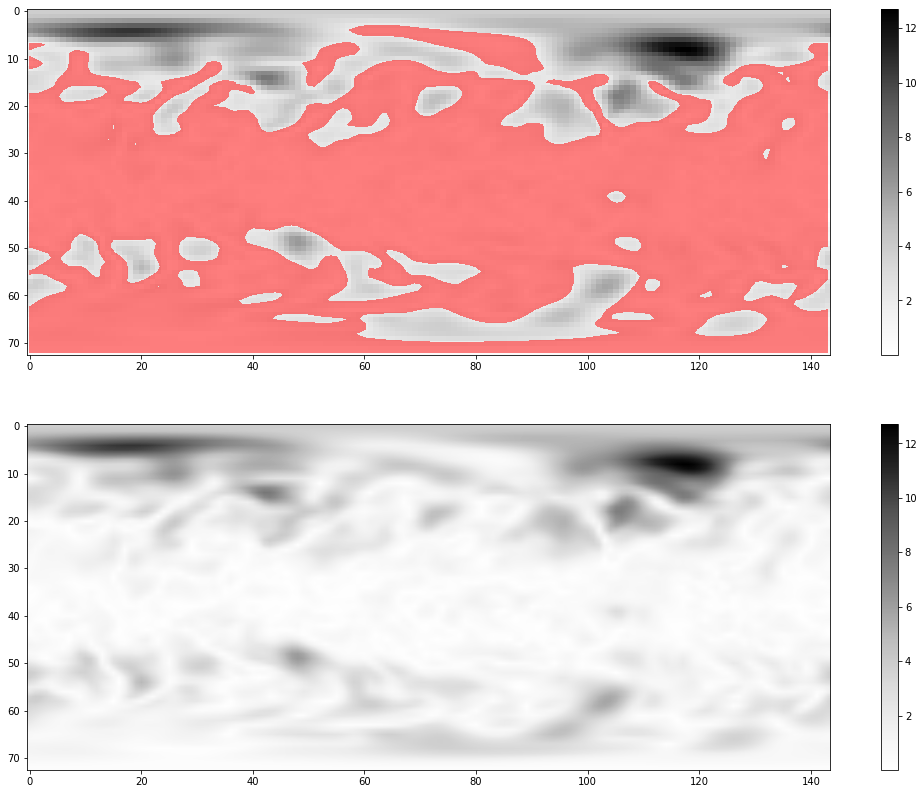

In [44]:
m1 = 0
m2 = 1

diff = wasserstein(models[m1,:,:,0], models[m1,:,:,1]**2, models[m2,:,:,0], models[m2,:,:,1]**2)

plt.figure(figsize=(18,14))

plt.subplot(2,1,1)
plt.contourf(diff, levels=[0, 2], colors=['red'], alpha=0.5)
plt.imshow(diff, cmap='Greys', aspect='auto', interpolation='none')
plt.colorbar()

plt.subplot(2,1,2)
plt.imshow(diff, cmap='Greys', aspect='auto', interpolation='bilinear')
plt.colorbar()

plt.show()

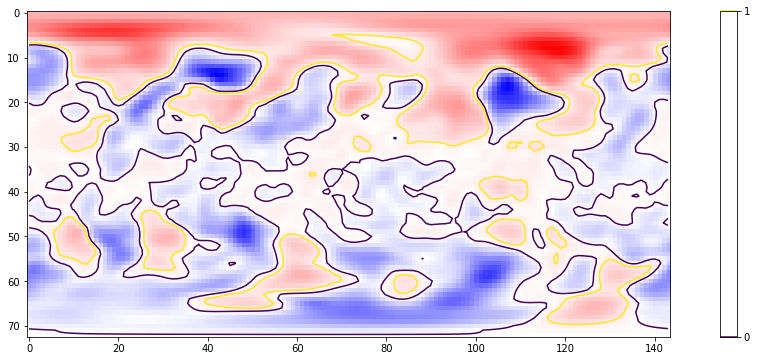

In [68]:
above = models[m1,:,:,0] - models[m2,:,:,0]

norm = colors.TwoSlopeNorm(vmin=above.min(), vcenter=0, vmax=above.max())

plt.figure(figsize=(18,6))
plt.imshow(above, cmap='bwr', norm=norm)
plt.contour(above, levels=[0.0, 1])
plt.colorbar()
plt.show()

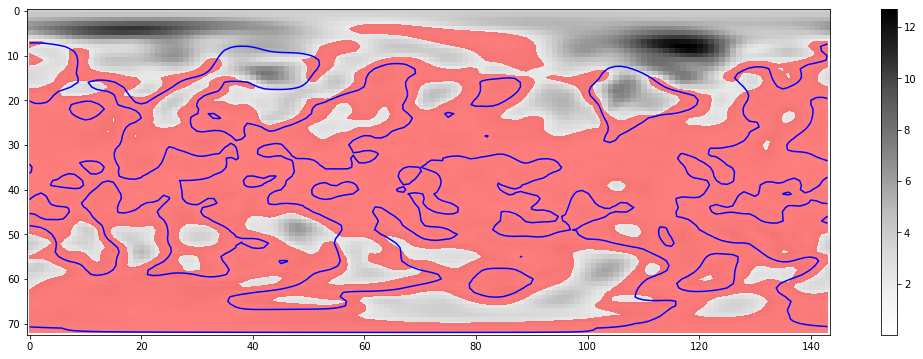

In [72]:
critical = (above  -1e-9)
grad = np.linalg.norm(np.gradient(above), axis=0)

plt.figure(figsize=(18,6))

plt.contourf(diff, levels=[0, 2], colors=['red'], alpha=0.5)
plt.contour(above, levels=[0.0], colors='blue')
plt.imshow(diff, cmap='Greys', aspect='auto', interpolation='none')
plt.colorbar()

plt.show()